In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.ticker import MultipleLocator

import sys
sys.path.append('../')
from kinetic_fit.equations import *

Loding data into dataframes:

In [2]:
NAD_000 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=3, nrows=10,  usecols='A:G')
NAD_010 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=3, nrows=10,  usecols='J:P')
NAD_025 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=3, nrows=10,  usecols='S:Y')
NAD_050 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=17, nrows=10,  usecols='A:G')
NAD_075 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=17, nrows=10,  usecols='J:P')
NAD_100 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=17, nrows=10,  usecols='S:Y')
NAD_200 = pd.read_excel('NAD.xlsx', sheet_name='Sheet1', skiprows=31, nrows=10,  usecols='A:G')

Calculating K values for each event:

In [3]:
# Normalizing
def normalize(df_):
    df_.columns = ['Time (min)','A0','A1','A2','A3','A4','A5']
    return pd.concat([df_['Time (min)'],df_.iloc[:,1:].div(df_.iloc[:,1:].sum(axis=1), axis=0)], axis=1)
    
NAD_000 = normalize(NAD_000)
NAD_010 = normalize(NAD_010)
NAD_025 = normalize(NAD_025)
NAD_050 = normalize(NAD_050)
NAD_075 = normalize(NAD_075)
NAD_100 = normalize(NAD_100)
NAD_200 = normalize(NAD_200)

In [8]:
k_vals = {'0.00 NAD+':NAD_000, '0.10 NAD+':NAD_010, '0.25 NAD+':NAD_025, '0.50 NAD+':NAD_050, '0.75 NAD+':NAD_075, '1.00 NAD+':NAD_100, '2.00 NAD+':NAD_200}
contour_ = {'0.00 NAD+':0, '0.10 NAD+':0, '0.25 NAD+':0, '0.50 NAD+':0, '0.75 NAD+':0, '1.00 NAD+':0, '2.00 NAD+':0}

for key in k_vals.keys():
    df = k_vals[key]
    fit = ParameterFitter(t = df['Time (min)'], A_ = [df['A0'], df['A1'], df['A2'], df['A3'], df['A4'], df['A5']])
    fit.fit()
    k_vals[key] = fit.get_parameters()
    contour_[key] = fit.get_contour()

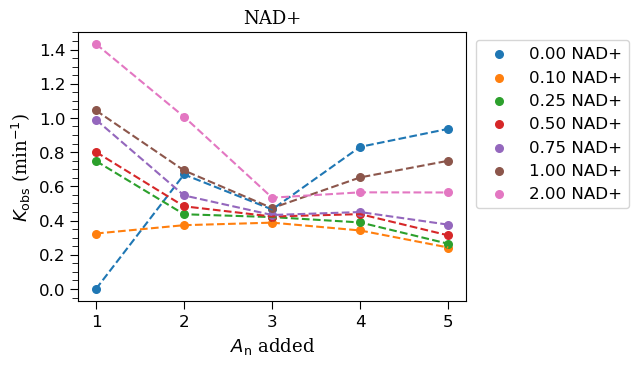

In [9]:
# Plot k values
fig, ax = plt.subplots(figsize=(5, 3.5))
for key in k_vals.keys():
    ax.scatter(np.arange(1, 6), k_vals[key][:-1], label=key, s=30)
    ax.plot(np.arange(1, 6),k_vals[key][:-1], '--')

ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, length=6)
plt.gca().tick_params(axis='x', which='minor', bottom=False)
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
plt.tick_params(axis='y', which='minor', length=4)
plt.title('NAD+', family='serif', fontsize=13)

legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
plt.savefig('NAD_1_1.png', dpi=250, bbox_inches='tight')

In [7]:
# # Plot k values
# fig, ax = plt.subplots(figsize=(5, 3.5))
# for key in k_vals.keys():
#     if key in ['0.25 NAD+', '0.50 NAD+', '0.75 NAD+', '1.00 NAD+']:
#         ax.scatter(np.arange(1, 7), k_vals[key], label=key, s=30)
#         plt.plot(np.arange(1, 7),k_vals[key], '--')

# ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
# ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

# plt.minorticks_on()
# plt.tick_params(axis='both', which='major', labelsize=12, length=6)
# plt.gca().tick_params(axis='x', which='minor', bottom=False)
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
# plt.tick_params(axis='y', which='minor', length=4)
# plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

# legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
# plt.savefig('k_vs_A_NAD_2.png', dpi=250, bbox_inches='tight')

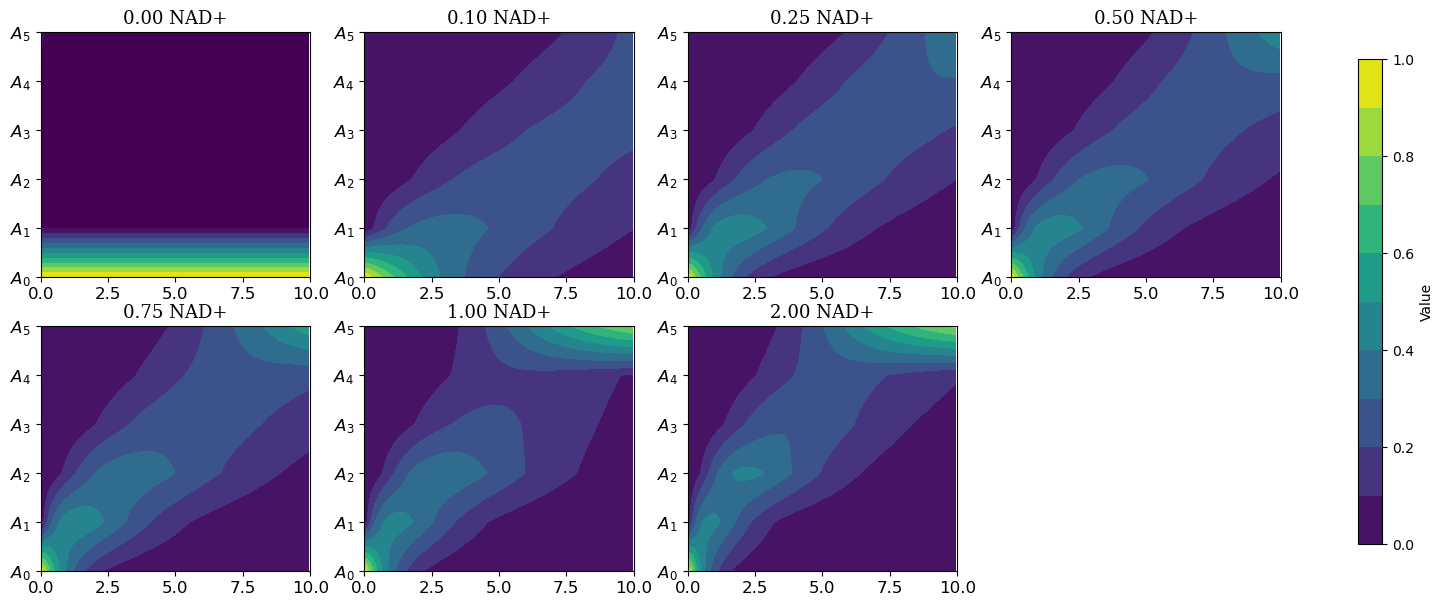

In [16]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,7), gridspec_kw={'wspace': 0.2})
axs = axs.flatten()
for ax, key in zip(axs, contour_.keys()):
    contours = ax.contourf(contour_[key], levels=10, cmap='viridis', vmin=0, vmax=1)
    x_ = np.arange(0, contour_[key].shape[1]+1, 50)
    ax.set_xticks(x_)
    ax.set_xticklabels(x_*0.05)
    ax.set_title(key, family='serif', fontsize=13)  
    ax.set_yticks(range(6))
    ax.set_yticklabels([fr'$A_{{{n}}}$' for n in np.arange(6)])
    ax.tick_params(axis='both', labelsize=12)
    
cbar = plt.colorbar(contours, ax=axs.ravel().tolist(), shrink=0.9)
cbar.set_label('Value')
fig.delaxes(axs[-1])
plt.savefig('NAD_2_1.png', dpi=250, bbox_inches='tight')